In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline





In [104]:
df=pd.read_csv("in-vehicle-coupon-recommendation.csv")
df

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [105]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["destination"] = le.fit_transform(df["destination"])
df["passanger"] = le.fit_transform(df["passanger"])
df["weather"] = le.fit_transform(df["weather"])
df["coupon"] = le.fit_transform(df["coupon"])
df["gender"] = le.fit_transform(df["gender"])
df["age"] = le.fit_transform(df["age"])
df["expiration"]=le.fit_transform(df["expiration"])
df["maritalStatus"] = le.fit_transform(df["maritalStatus"])
df["education"]=le.fit_transform(df["education"])
df.dtypes

,0
destination,int64
passanger,int64
weather,int64
temperature,int64
time,object
coupon,int64
expiration,int64
gender,int64
age,int64
maritalStatus,int64


In [106]:

df["occupation"]=le.fit_transform(df["occupation"])
df["income"]=le.fit_transform(df["income"])
df["car"]=le.fit_transform(df["car"])
df["Bar"]=le.fit_transform(df["Bar"])
df["CoffeeHouse"]=le.fit_transform(df["CoffeeHouse"])
df["CarryAway"]=le.fit_transform(df["CarryAway"])
df["RestaurantLessThan20"]=le.fit_transform(df["RestaurantLessThan20"])
df["Restaurant20To50"]=le.fit_transform(df["Restaurant20To50"])
df.shape


(12684, 26)

In [107]:

df["maritalStatus"] = le.fit_transform(df["maritalStatus"])
df["education"]=le.fit_transform(df["education"])
df["occupation"]=le.fit_transform(df["occupation"])
df["income"]=le.fit_transform(df["income"])
df["car"]=le.fit_transform(df["car"])
df["Bar"]=le.fit_transform(df["Bar"])
df["CoffeeHouse"]=le.fit_transform(df["CoffeeHouse"])
df["CarryAway"]=le.fit_transform(df["CarryAway"])
df["RestaurantLessThan20"]=le.fit_transform(df["RestaurantLessThan20"])
df["Restaurant20To50"]=le.fit_transform(df["Restaurant20To50"])
df.shape


(12684, 26)

In [108]:
df.replace(np.nan, 0, inplace=True)
time_mapping = {
    "12AM": 0, "1AM": 1, "2AM": 2, "3AM": 3, "4AM": 4, "5AM": 5, "6AM": 6, "7AM": 7, "8AM": 8, "9AM": 9, "10AM": 10, "11AM": 11,
    "12PM": 12, "1PM": 13, "2PM": 14, "3PM": 15, "4PM": 16, "5PM": 17, "6PM": 18, "7PM": 19, "8PM": 20, "9PM": 21, "10PM": 22, "11PM": 23
}
df['time'] = df['time'].map(time_mapping)
df


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,1,0,2,55,14,4,0,0,0,3,...,4,5,1,0,1,0,0,0,1,1
1,1,1,2,80,10,2,1,0,0,3,...,4,5,1,0,1,0,0,0,1,0
2,1,1,2,80,10,1,1,0,0,3,...,4,5,1,0,1,1,0,0,1,1
3,1,1,2,80,14,2,1,0,0,3,...,4,5,1,0,1,1,0,0,1,0
4,1,1,2,80,14,2,0,0,0,3,...,4,5,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,0,3,0,55,18,1,0,1,1,2,...,4,0,1,0,1,0,0,1,0,1
12680,2,0,0,55,7,1,0,1,1,2,...,4,0,1,0,1,0,0,0,1,1
12681,2,0,1,30,7,2,0,1,1,2,...,4,0,1,0,1,0,0,1,0,0
12682,2,0,1,30,7,0,0,1,1,2,...,4,0,1,0,1,1,1,0,1,0


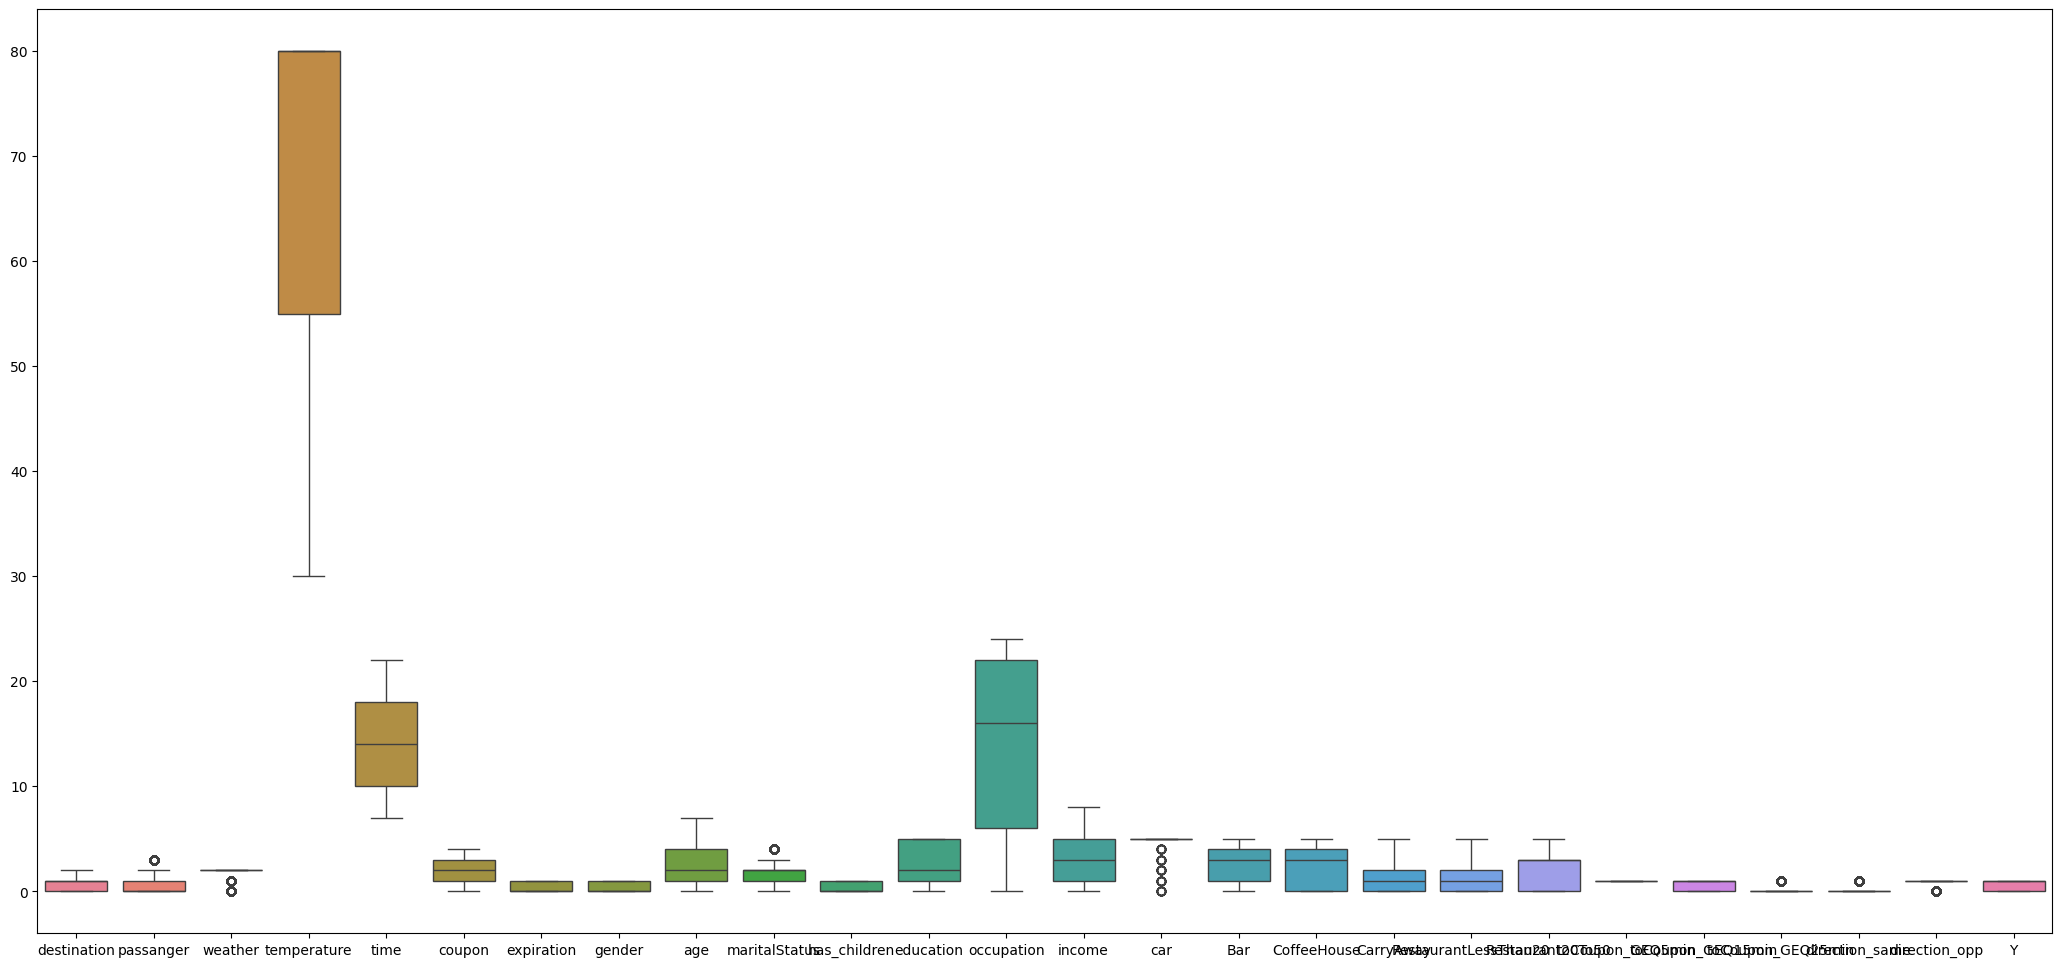

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(26,12))
sns.boxplot(data=df)
plt.show()

In [110]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_cleaned


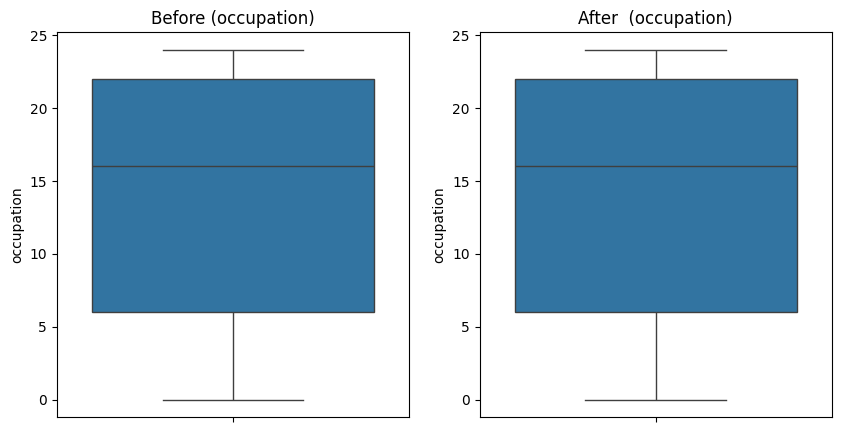

In [111]:
df_cleaned = remove_outliers_iqr(df, "temperature")
df_cleaned = remove_outliers_iqr(df_cleaned, "occupation")
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df["occupation"])
plt.title("Before (occupation)")

plt.subplot(1, 2, 2)
sns.boxplot(y=df_cleaned["occupation"])
plt.title("After  (occupation)")

plt.show()

In [ ]:
df.replace(['NV', np.nan], 0, inplace=True)

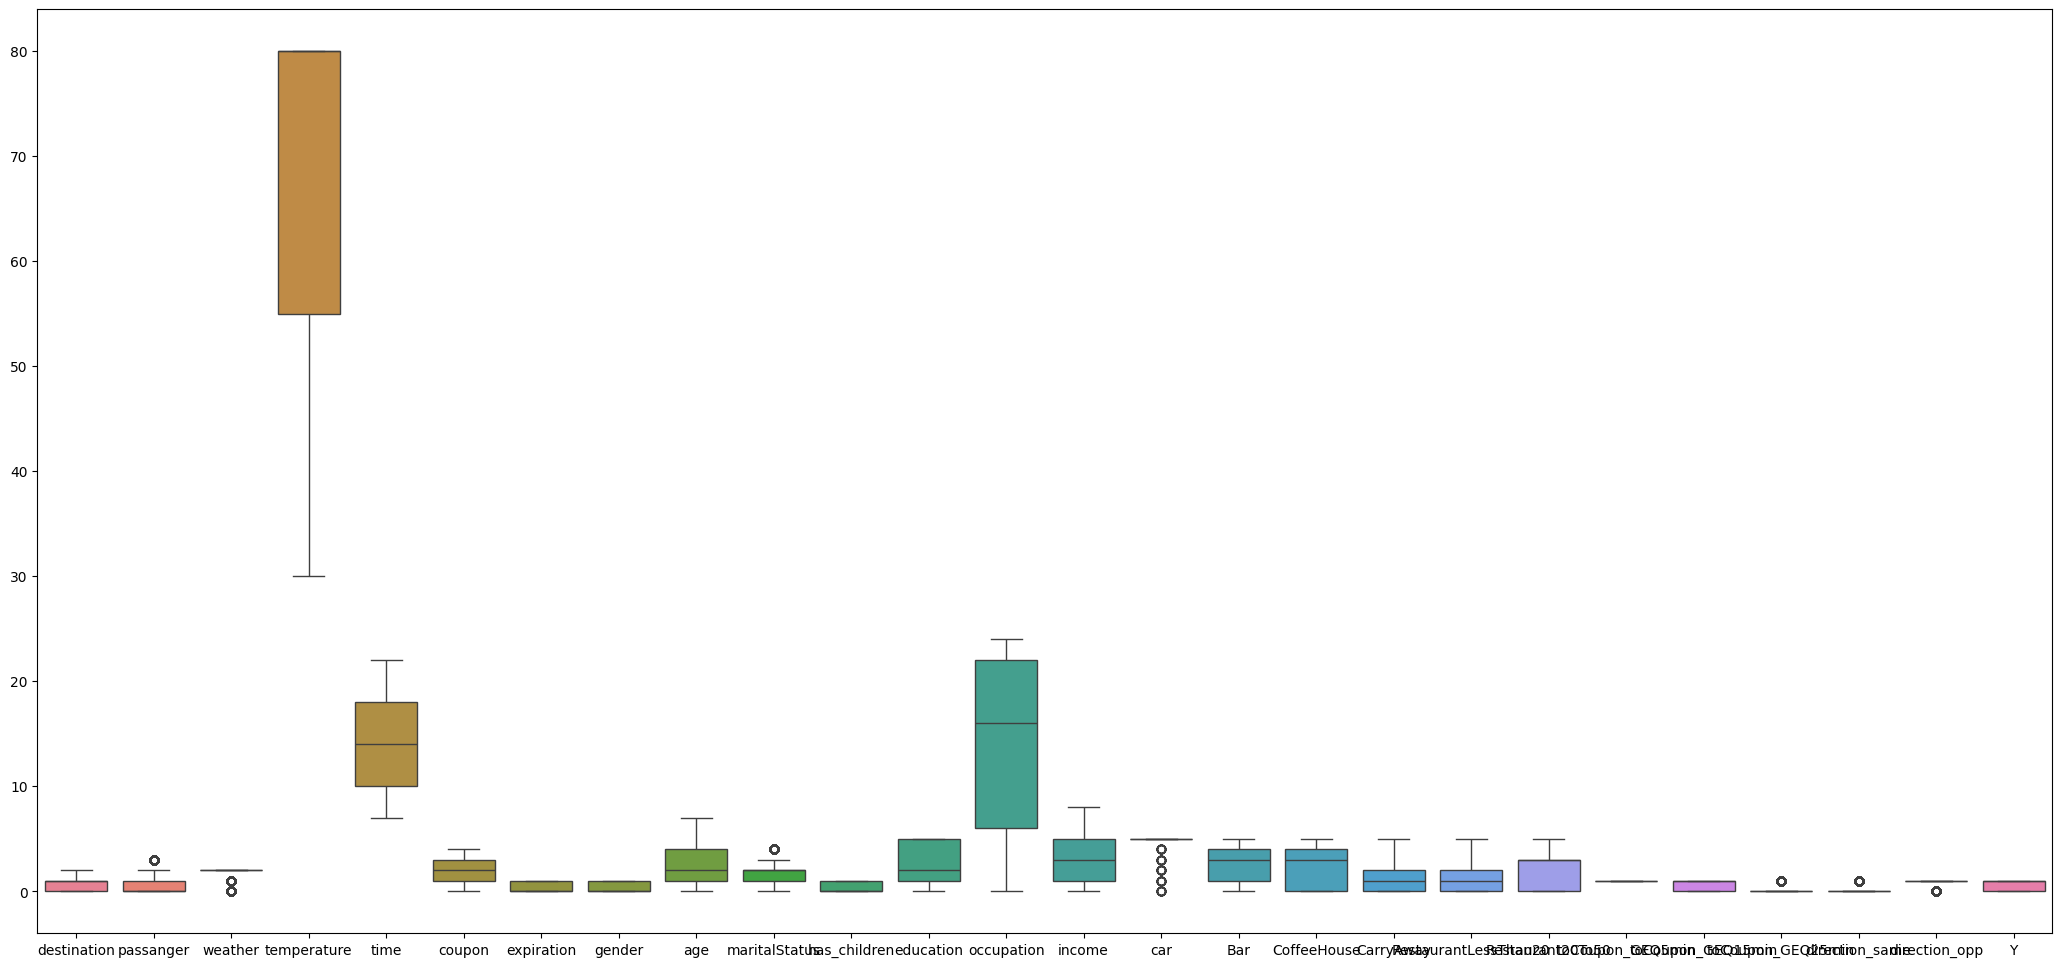

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(26,12))
sns.boxplot(data=df)
plt.show()

In [74]:
df.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0
